## 영화평점에 대한 평점변화(시각화)[실습]

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from urllib.error import HTTPError
from urllib.error import URLError
import pandas as pd

In [30]:
base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&tg=0&date=20170501'

try :
    html = urlopen(base_url + sub_url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser')

In [31]:
soup.find_all('div', 'tit5')[0].a.text

'히든 피겨스'

In [32]:
soup.find_all('td', 'point')[0].text

'9.38'

In [33]:
# 배열 길이가 서로 같은지 확인
print(len(soup.find_all('div', 'tit5')))
print(len(soup.find_all('td', 'point')))

50
50


In [34]:
movie_names = [soup.find_all('div', 'tit5')[n].a.get_text() for n in range(50)]
print(movie_names)

['히든 피겨스', '사운드 오브 뮤직', '시네마 천국', '미스 슬로운', '잉여들의 히치하이킹', '나, 다니엘 블레이크', '바람과 함께 사라지다', '오즈의 마법사', '벤허', '흑집사 : 북 오브 더 아틀란틱', '우리들', '일 포스티노', '댄서', '라이언', '코알라', '로건', '더 플랜', '분노의 질주: 더 익스트림', '시카고', '10분', '해리가 샐리를 만났을 때', '미녀와 야수', '너의 이름은.', '그랑블루', '한공주', '연애담', '포켓몬 더 무비 XY&Z; 「볼케니온 : 기계왕국의 비밀」', '리틀 프린세스 소피아: 엘레나와 비밀의 아발로 왕국', '분노', '맨체스터 바이 더 씨', '행복 목욕탕', '스머프: 비밀의 숲', '부당거래', '파닥파닥', '아비정전', '패션 오브 크라이스트', '라라랜드', '뽀로로 극장판 슈퍼썰매 대모험', '족구왕', '가디언즈 오브 갤럭시', '자전거 탄 소년', '오두막', '성실한 나라의 앨리스', '원라인', '존 윅 - 리로드', '사일런스', '클로저', '임금님의 사건수첩', '문라이트', '로미오와 줄리엣']


In [35]:
movie_points = [soup.find_all('td', 'point')[n].get_text() for n in range(50)]
print(movie_points)

['9.38', '9.36', '9.29', '9.26', '9.25', '9.25', '9.24', '9.23', '9.22', '9.20', '9.18', '9.17', '9.14', '9.07', '9.07', '9.06', '9.04', '9.02', '8.92', '8.89', '8.89', '8.85', '8.81', '8.78', '8.78', '8.76', '8.75', '8.73', '8.73', '8.72', '8.70', '8.67', '8.66', '8.65', '8.59', '8.59', '8.59', '8.56', '8.56', '8.56', '8.54', '8.48', '8.39', '8.29', '8.28', '8.26', '8.20', '8.17', '8.12', '8.10']


In [36]:
# pandas 의 date_range 함수
# 지정 날짜부터 periods 의 기간 만큼의 날짜를 데이터프레임 형식으로 저장한다.
date = pd.date_range('2017-5-1', periods = 100, freq = 'D')
# date

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [40]:
import urllib
from tqdm import tqdm_notebook
import time

In [41]:
# tqdm_notebook
# 반복문의 진행 상황을 바 형식으로 보여준다.
# for n in tqdm_notebook(range(100)) :
#     time.sleep(0.1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [42]:
# for x in tqdm_notebook(range(2), desc = 'outer') :
#     for y in tqdm_notebook(range(1000), desc = 'inner') :
#         time.sleep(0.1)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [119]:
# 위에서 만든 date 날짜 별로 
# 영화의 이름과 평점들을 scraping 하기
names_result = []
points_result = []
date_result = []

base_url = 'https://movie.naver.com/'
sub_url = 'movie/sdb/rank/rmovie.nhn?sel=cur&date='

for day in tqdm_notebook(date) :
    # url 에 위에서 만든 날짜변수 이름을 뒤에 덧붙여서 html 변수에 저장
    html = base_url + sub_url + '{date}'
    
    # url open 이후 html 형식으로 저장
    # 뒤에 덧붙여진 {date}에 날짜 하나하나를 반복해서 넣는데
    # 날짜를  20170501  형식으로 만들어서(strftime 함수) 넣는 작업 진행
    # urllib.parse.quote() : 문자열에 들어있는 특수문자를 문자열로 변환하여 반환하는 함수
    response = urlopen(html.format(date = urllib.parse.quote(day.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'html.parser')
    
    # 데이터 개수 저장
    end = len(soup.find_all('td', 'point'))
    
    # append 가 아닌 extend를 쓰는 이유
    # 리스트 자체를 저장하는 것이 아닌, 리스트 내부의 요소들을 직접 하나씩 저장하기 위해 사용
    names_result.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(end)])
    points_result.extend([soup.find_all('td', 'point')[n].string for n in range(end)])
    date_result.extend([day for n in range(end)])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


In [106]:
print(len(names_result))
print(len(points_result))
print(len(date_result))

4723
4723
4723
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00
2017-05-01 00:00:00


In [107]:
movieDf = pd.DataFrame({
    'date' : date_result,
    'name' : names_result,
    'point' : points_result
})
movieDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [108]:
# astype() 함수를 이용하여 컬럼의 타입을 변경할 수 있다.
movieDf['point'] = movieDf['point'].astype(float)
movieDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
date     4723 non-null datetime64[ns]
name     4723 non-null object
point    4723 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


In [109]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
# 피벗 테이블 이용 - 영화의 평점 총점을 구할 수 있다.
# sql 의 group_by 절과 같은 맥락
# aggfunc 옵션으로 집계함수 사용 가능
movie_pivot = pd.pivot_table(movieDf, index = ['name'], aggfunc = np.sum)
movie_pivot.head()

,point
name,
10분,124.46
47 미터,149.23
500일의 썸머,75.51
7년-그들이 없는 언론,137.28
7번째 내가 죽던 날,407.48


In [111]:
# 결과에 대한 정렬이 필요할 경우
# sort_values(by = , ascending = )
movie_pivot_sort = movie_pivot.sort_values(by = 'point', ascending = False)
movie_pivot_sort.head()

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42


In [112]:
# sql 의 where 절과 같은 맥락
# 내가 원하는 조건을 걸 수 있다.
temp = movieDf.query('name == ["너의 이름은."]')
# temp

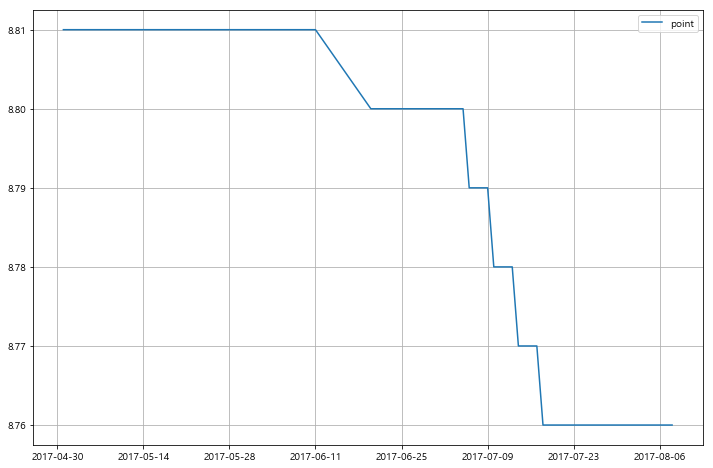

In [113]:
# 시각화
# plot 의 크기를 지정
plt.figure(figsize = (12, 8))

# plot 의 x축 및 y축 지정
plt.plot(temp['date'], temp['point'])

# plot의 범례 위치 설정
plt.legend(loc = 'best')

# plot의 격자 무늬 형성
plt.grid()

# plot 그리기
plt.show()

## 영화별 날짜 변화에 따른 평점 변화 시각화[실습]

In [114]:
movie_date_point_pivot = pd.pivot_table(movieDf, index = ['date'], columns = ['name'], values = ['point'])
movie_date_point_pivot.head()

point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   

                                                ...                           \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ...   하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                            
2017-05-01        8.56                NaN  NaN  ...          NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...          NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...          NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...          NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...          NaN         NaN   

                                                                                
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕 헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱 히든 피겨스  
date                                                                            
2017-05-01  8.78          8.89   NaN   8.70 NaN   NaN              9.20   9.38  
2017-05-02  8.78          8.89   NaN   8.68 NaN   NaN              9.21   9.37  
2017-05-03  8.78          8.89   NaN   8.70 NaN   NaN              9.22   9.38  
2017-05-04  8.78           NaN   NaN   8.67 NaN   NaN              9.23   9.38  
2017-05-05  8.78           NaN   NaN   8.69 NaN   NaN              9.24   9.37  

[5 rows x 204 columns]

In [115]:
# 레벨을 한 단계 낮춘다.
# point 컬럼을 없애준다.
movie_date_point_pivot.columns = movie_date_point_pivot.columns.droplevel()
movie_date_point_pivot.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


In [116]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

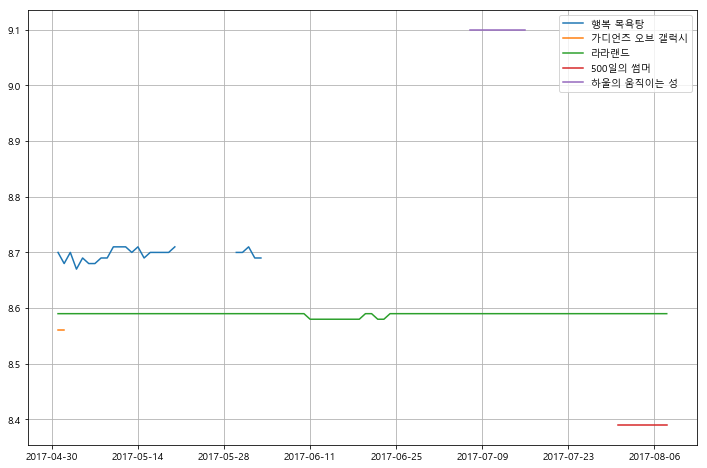

In [117]:
target_col = ['행복 목욕탕', '가디언즈 오브 갤럭시', '라라랜드', '500일의 썸머', '하울의 움직이는 성']

# 시각화
plt.figure(figsize = (12, 8))
plt.plot(movie_date_point_pivot[target_col])
plt.legend(target_col, loc = 'best')
plt.grid()
plt.show()